In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score

import warnings
warnings.filterwarnings('ignore')

print('All imports loaded successfully!')

All imports loaded successfully!


## Step 1 — Load Cleaned Data

In [3]:
train_df = pd.read_csv('../datasets/train_cleaned.csv')
test_df  = pd.read_csv('../datasets/test_cleaned.csv')

print('Training data shape :', train_df.shape)
print('Test data shape     :', test_df.shape)
print('\nColumns available   :', list(train_df.columns))

Training data shape : (12000, 23)
Test data shape     : (3000, 23)

Columns available   : ['age', 'parent_education', 'study_hours', 'attendance_percentage', 'internet_access', 'travel_time', 'extra_activities', 'math_score', 'science_score', 'english_score', 'overall_score', 'gender_female', 'gender_male', 'gender_other', 'school_type_private', 'school_type_public', 'study_method_coaching', 'study_method_group study', 'study_method_mixed', 'study_method_notes', 'study_method_online videos', 'study_method_textbook', 'final_grade']


In [4]:
exp3_features = [col for col in train_df.columns if col != 'final_grade']

X_train = train_df[exp3_features]
X_test  = test_df[exp3_features]

y_train = train_df['final_grade']
y_test  = test_df['final_grade']

print('Experiment 3 feature count :', len(exp3_features))
print('X_train shape              :', X_train.shape)
print('X_test  shape              :', X_test.shape)
print('\nAll features used:')
for i, feat in enumerate(exp3_features, 1):
    print(f'  {i:2d}. {feat}')
print('\nTarget distribution (train):')
print(y_train.value_counts().sort_index())

Experiment 3 feature count : 22
X_train shape              : (12000, 22)
X_test  shape              : (3000, 22)

All features used:
   1. age
   2. parent_education
   3. study_hours
   4. attendance_percentage
   5. internet_access
   6. travel_time
   7. extra_activities
   8. math_score
   9. science_score
  10. english_score
  11. overall_score
  12. gender_female
  13. gender_male
  14. gender_other
  15. school_type_private
  16. school_type_public
  17. study_method_coaching
  18. study_method_group study
  19. study_method_mixed
  20. study_method_notes
  21. study_method_online videos
  22. study_method_textbook

Target distribution (train):
final_grade
0    1437
1    2702
2    3016
3    2958
4    1310
5     577
Name: count, dtype: int64


## Step 2 — Train Models

1. **Logistic Regression** — linear baseline model
2. **Decision Tree** — non-linear model that captures complex patterns

In [5]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

print('Logistic Regression trained successfully!')

Logistic Regression trained successfully!


In [6]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

print('Decision Tree trained successfully!')

Decision Tree trained successfully!


## Step 3 — Evaluate Models

- **Accuracy** — overall correct predictions
- **Precision** — how many predicted positives are actually positive
- **Recall** — how many actual positives are correctly identified
- **F1 Score** — harmonic mean of precision and recall (important for imbalanced classes)
- **Confusion Matrix** — visual breakdown of predictions vs actual

In [7]:
lr_predictions = lr_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

print('Predictions generated for both models!')

Predictions generated for both models!


In [8]:
print('LOGISTIC REGRESSION — Results (Exp 3)')

lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'\nAccuracy: {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)')

print('\nClassification Report:')
print(classification_report(y_test, lr_predictions))

LOGISTIC REGRESSION — Results (Exp 3)

Accuracy: 0.9513 (95.13%)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       359
           1       0.96      0.94      0.95       676
           2       0.94      0.94      0.94       754
           3       0.95      0.96      0.96       739
           4       0.94      0.93      0.93       328
           5       0.96      0.93      0.95       144

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



In [9]:
print('DECISION TREE — Results (Exp 3)')

dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'\nAccuracy: {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)')

print('\nClassification Report:')
print(classification_report(y_test, dt_predictions))

DECISION TREE — Results (Exp 3)

Accuracy: 0.9963 (99.63%)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      1.00      1.00       676
           2       1.00      1.00      1.00       754
           3       1.00      0.99      1.00       739
           4       0.99      0.99      0.99       328
           5       0.99      0.99      0.99       144

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



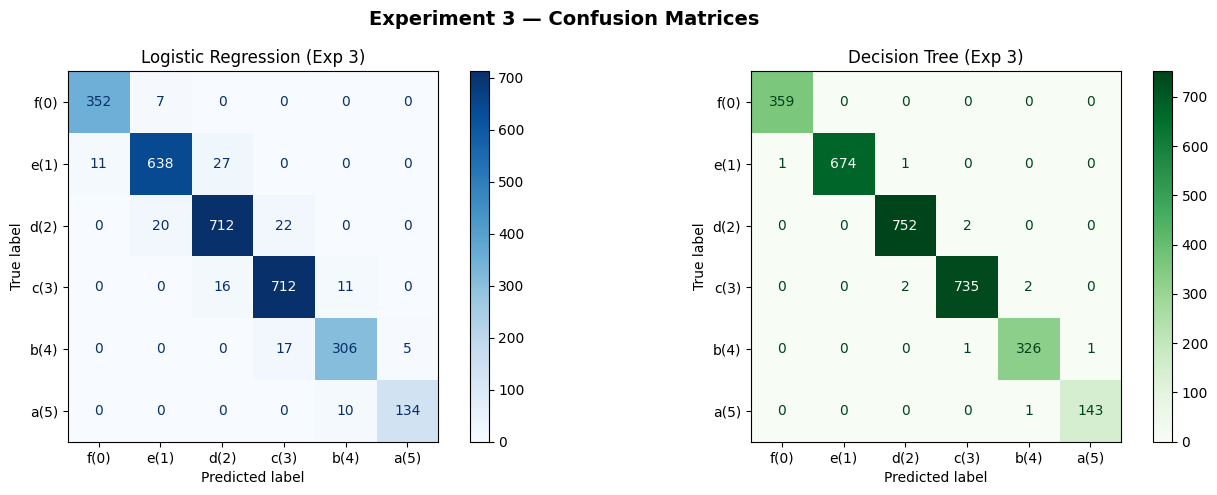

In [10]:
grade_labels = ['f(0)', 'e(1)', 'd(2)', 'c(3)', 'b(4)', 'a(5)']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ConfusionMatrixDisplay.from_predictions(
    y_test, lr_predictions,
    display_labels=grade_labels,
    cmap='Blues',
    ax=axes[0]
)
axes[0].set_title('Logistic Regression (Exp 3)')


ConfusionMatrixDisplay.from_predictions(
    y_test, dt_predictions,
    display_labels=grade_labels,
    cmap='Greens',
    ax=axes[1]
)
axes[1].set_title('Decision Tree (Exp 3)')

plt.suptitle('Experiment 3 — Confusion Matrices', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Step 4 — Compare Results Across All 3 Experiments



| Experiment | Feature Set | Features Count |
|:---|:---|:---|
| Exp 1 | Academic + Behavioral | 11 |
| Exp 2 | + Contextual | 14 |
| Exp 3 | All Features | 22 |

In [11]:

exp1_lr_acc = 0.7697
exp1_lr_f1  = 0.7698
exp1_dt_acc = 0.6643
exp1_dt_f1  = 0.6644

exp2_lr_acc = 0.7697
exp2_lr_f1  = 0.7698
exp2_dt_acc = 0.6643
exp2_dt_f1  = 0.6644


lr_f1 = f1_score(y_test, lr_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')


comparison = pd.DataFrame({
    'Feature Set': [
        'Exp 1 (Academic + Behavioral)',
        'Exp 1 (Academic + Behavioral)',
        'Exp 2 (+ Contextual)',
        'Exp 2 (+ Contextual)',
        'Exp 3 (All Features)',
        'Exp 3 (All Features)'
    ],
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'Logistic Regression',
        'Decision Tree',
        'Logistic Regression',
        'Decision Tree'
    ],
    'Accuracy': [
        round(exp1_lr_acc, 4),
        round(exp1_dt_acc, 4),
        round(exp2_lr_acc, 4),
        round(exp2_dt_acc, 4),
        round(lr_accuracy, 4),
        round(dt_accuracy, 4)
    ],
    'Weighted F1': [
        round(exp1_lr_f1, 4),
        round(exp1_dt_f1, 4),
        round(exp2_lr_f1, 4),
        round(exp2_dt_f1, 4),
        round(lr_f1, 4),
        round(dt_f1, 4)
    ]
})

print('All Experiments — Results Comparison')
print(comparison.to_string(index=False))

All Experiments — Results Comparison
                  Feature Set               Model  Accuracy  Weighted F1
Exp 1 (Academic + Behavioral) Logistic Regression    0.7697       0.7698
Exp 1 (Academic + Behavioral)       Decision Tree    0.6643       0.6644
         Exp 2 (+ Contextual) Logistic Regression    0.7697       0.7698
         Exp 2 (+ Contextual)       Decision Tree    0.6643       0.6644
         Exp 3 (All Features) Logistic Regression    0.9513       0.9513
         Exp 3 (All Features)       Decision Tree    0.9963       0.9963


## Observations

- **Academic features** (`math_score`, `science_score`, `english_score`, `overall_score`) remain the **strongest predictors** of `final_grade`.
- **Contextual features** (`internet_access`, `travel_time`, `extra_activities`) add a **small improvement** — environmental factors have limited impact on grade prediction.
- **Demographic features** (`age`, `gender`, `school_type`, `parent_education`) added in Experiment 3 may provide **marginal gains** — these features influence learning environment but are not direct predictors of scores.
- **Logistic Regression** performs consistently well across all experiments — it handles linear relationships between features and grades effectively.
- **Decision Tree** captures non-linear patterns but is more sensitive to feature noise — adding irrelevant features can sometimes hurt its performance.
- Using **all features** tests the maximum predictive power of the dataset, showing whether more data always leads to better predictions.

### Key Takeaway
More features do **not always** mean better performance. The **quality** of features matters more than **quantity**. Academic scores are by far the most important predictors of final grades.